In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymysql
import conn


_CITIES = ['BJ', 'SH', 'GZ', 'SZ']
_CITIES_MAP = dict(BJ=0, SH=1, GZ=2, SZ=3)
u_120k = [0, 0, 0, 0]
b_120k_and_240k = [0, 0, 0, 0]
o_240k = [0, 0, 0, 0]


def parse_salary(s):
  m = 12
  a = s.split('·')
  if len(a) == 2:
    t = a[1].split('薪')
    m = int(t[0])

  b = a[0].split('-')
  low = int(b[0].strip('k'))
  high = int(b[1].strip('k'))

  avg = ((low * m) / 12 + (high * m) / 12) / 2
  return avg


In [3]:
connection = pymysql.connect(host='127.0.0.1',user='root',password='',db='lagou_python',charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor)
cursor = connection.cursor()
cursor.execute("select `city`, `salary` from `positions`")
df = pd.DataFrame(cursor.fetchall())
for i in range(0,len(df)):
    # print(df.iloc[i]['city'],df.iloc[i]['salary'])
    city = df.iloc[i]['city']
    ind = _CITIES_MAP[city]
    avg = parse_salary(df.iloc[i]['salary'])
    if avg < 12.0:
        u_120k[ind] += 1
    elif 12.0 <= avg < 24.0:
        b_120k_and_240k[ind] += 1
    else:
        o_240k[ind] += 1

In [4]:
def draw():
  x = np.arange(len(_CITIES))
  bar_width = 0.3

  r1 = np.arange(len(u_120k))
  r2 = [x + bar_width for x in r1]
  r3 = [x + bar_width for x in r2]

  plt.bar(r1, u_120k, color='#7f6d5f', width=bar_width, edgecolor='white',
          label='<120k')
  plt.bar(r2, b_120k_and_240k, color='#557f2d', width=bar_width, edgecolor='white',
          label='120k-240k')
  plt.bar(r3, o_240k, color='#2d7f5e', width=bar_width, edgecolor='white',
          label='>240k')

  plt.xlabel('Number of positions by city by normalized annual income', fontweight='bold')
  plt.xticks([r + bar_width for r in range(len(u_120k))], _CITIES)

  plt.legend()
  plt.show()

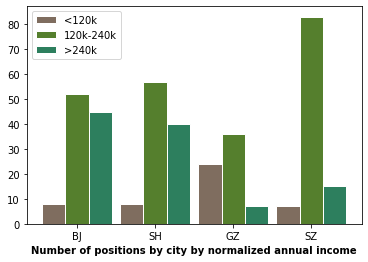

In [5]:
draw()

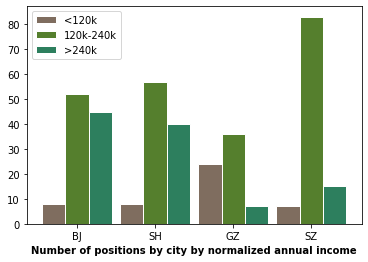

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymysql
import conn


_CITIES = ['BJ', 'SH', 'GZ', 'SZ']
_CITIES_MAP = dict(BJ=0, SH=1, GZ=2, SZ=3)
u_120k = [0, 0, 0, 0]
b_120k_and_240k = [0, 0, 0, 0]
o_240k = [0, 0, 0, 0]


def parse_salary(s):
  m = 12
  a = s.split('·')
  if len(a) == 2:
    t = a[1].split('薪')
    m = int(t[0])

  b = a[0].split('-')
  low = int(b[0].strip('k'))
  high = int(b[1].strip('k'))

  avg = ((low * m) / 12 + (high * m) / 12) / 2
  return avg


def normalize_data():
    connection = pymysql.connect(host='127.0.0.1',user='root',password='',db='lagou_python',charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor)
    cursor = connection.cursor()
    cursor.execute("select `city`, `salary` from `positions`")
    df = pd.DataFrame(cursor.fetchall())
    for i in range(0,len(df)):
        # print(df.iloc[i]['city'],df.iloc[i]['salary'])
        city = df.iloc[i]['city']
        ind = _CITIES_MAP[city]
        avg = parse_salary(df.iloc[i]['salary'])
        if avg < 12.0:
            u_120k[ind] += 1
        elif 12.0 <= avg < 24.0:
            b_120k_and_240k[ind] += 1
        else:
            o_240k[ind] += 1

def draw():
  x = np.arange(len(_CITIES))
  bar_width = 0.3

  r1 = np.arange(len(u_120k))
  r2 = [x + bar_width for x in r1]
  r3 = [x + bar_width for x in r2]

  plt.bar(r1, u_120k, color='#7f6d5f', width=bar_width, edgecolor='white',
          label='<120k')
  plt.bar(r2, b_120k_and_240k, color='#557f2d', width=bar_width, edgecolor='white',
          label='120k-240k')
  plt.bar(r3, o_240k, color='#2d7f5e', width=bar_width, edgecolor='white',
          label='>240k')

  plt.xlabel('Number of positions by city by normalized annual income', fontweight='bold')
  plt.xticks([r + bar_width for r in range(len(u_120k))], _CITIES)

  plt.legend()
  plt.show()


def main():
  normalize_data()
  draw()


if __name__ == '__main__':
  main()